In [1]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('classicalCartPole-v1')

In [2]:
episodes.head(50)

,trial_id,run_id,episode,training_score,evaluation_score,epsilon,training_actions,training_steps,training_steps_cumsum,evaluation_actions,evaluation_observations,evaluation_predictions,environment,layers,learning_rate,neurons,number_of_weights
0,2023-03-17_09-11-51_thread_0_trial_0,run_0,0,17,10.0,0.99,"[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...",18,18,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[0.29757705, 0.4591406], [0.29124513, 0.44467...",CartPole-v1,4,0.03,16,1104
1,2023-03-17_09-11-51_thread_0_trial_0,run_0,1,28,10.0,0.88,"[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, ...",29,47,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[128.84653, 190.55498], [152.7653, 225.99893]...",CartPole-v1,4,0.03,16,1104
2,2023-03-17_09-11-51_thread_0_trial_0,run_0,2,23,10.0,0.80,"[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...",24,71,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[154.09886, 164.91315], [152.85582, 163.57642...",CartPole-v1,4,0.03,16,1104
3,2023-03-17_09-11-51_thread_0_trial_0,run_0,3,14,10.0,0.75,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]",15,86,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[106.72808, 108.617744], [106.29356, 108.1680...",CartPole-v1,4,0.03,16,1104
4,2023-03-17_09-11-51_thread_0_trial_0,run_0,4,12,8.0,0.71,"[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]",13,99,"[0, 0, 0, 0, 0, 0, 0, 0]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[102.73582, 97.076294], [102.98838, 97.324104...",CartPole-v1,4,0.03,16,1104
5,2023-03-17_09-11-51_thread_0_trial_0,run_0,5,23,10.0,0.65,"[0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",24,123,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[67.364685, 77.854546], [66.283295, 76.59167]...",CartPole-v1,4,0.03,16,1104
6,2023-03-17_09-11-51_thread_0_trial_0,run_0,6,26,8.0,0.58,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...",27,150,"[0, 0, 0, 0, 0, 0, 0, 0]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[81.83923, 75.59675], [83.453026, 77.104126],...",CartPole-v1,4,0.03,16,1104
7,2023-03-17_09-11-51_thread_0_trial_0,run_0,7,8,8.0,0.56,"[0, 0, 0, 0, 0, 1, 0, 1, 0]",9,159,"[0, 0, 0, 0, 0, 0, 0, 0]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[77.27183, 76.36154], [78.40637, 77.49935], [...",CartPole-v1,4,0.03,16,1104
8,2023-03-17_09-11-51_thread_0_trial_0,run_0,8,16,10.0,0.52,"[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",17,176,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[58.78804, 61.34136], [58.110836, 60.619717],...",CartPole-v1,4,0.03,16,1104
9,2023-03-17_09-11-51_thread_0_trial_0,run_0,9,9,10.0,0.50,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]",10,186,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0.047669977, -0.0119804265, 0.042324625, -0....","[[51.755615, 54.522305], [51.131462, 53.849323...",CartPole-v1,4,0.03,16,1104


In [3]:
# select best score per run
episodes_grouped = episodes.groupby(['trial_id', 'run_id']).agg(
    {'evaluation_score': 'max'}).reset_index()

# find best trial based on average evaluation score
episodes_grouped = episodes_grouped.groupby(['trial_id']).agg(
    {'evaluation_score': 'mean'}).reset_index()

In [4]:
# get the trial id of the best trial
best_trial_id = \
episodes_grouped[episodes_grouped['evaluation_score'] == episodes_grouped['evaluation_score'].max()]['trial_id'].values[
    0]
best_trial = episodes[episodes['trial_id'] == best_trial_id]

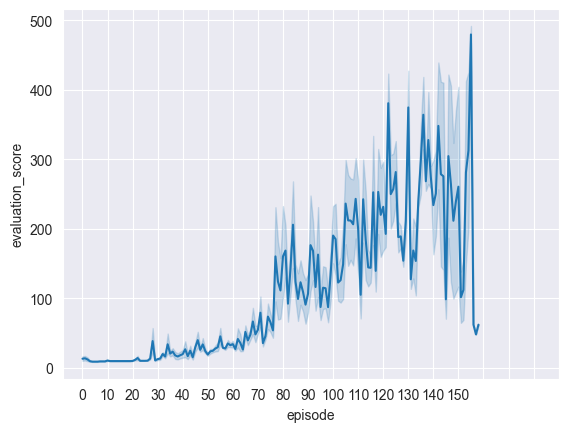

In [6]:
# plot the trial with the best average evaluation score
sns.lineplot(x='episode', y='evaluation_score', data=best_trial)
plt.xticks(range(0, 200, 10))
plt.show()
